In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_EM.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1999-01-31 00:00:00,1.00000,#VALUE!,#VALUE!,0.061413,0.0000,0.742285,0.734467,0.911793,0.896788,0.754677,0.726411,1.000000,0.981686,0.786902,0.725754,0.739139,0.398443,3.0
1,1999-02-28 00:00:00,1.00000,#VALUE!,#VALUE!,0.822168,0.8923,1.000000,1.000000,1.000000,1.000000,0.977482,0.950245,1.000000,1.000000,0.917165,0.888962,0.853224,0.502272,3.0
2,1999-03-31 00:00:00,1.00000,#VALUE!,#VALUE!,1.000000,1.0000,0.887461,0.894749,0.846522,0.876495,0.966473,0.916707,1.000000,1.000000,0.818541,0.754026,0.815425,0.469207,3.0
3,1999-04-30 00:00:00,0.91866,#VALUE!,#VALUE!,1.000000,1.0000,0.756134,0.787182,0.649044,0.635819,0.917259,0.875811,0.969175,0.952241,0.682769,0.549867,0.734817,0.375368,3.0
4,1999-05-31 00:00:00,1.00000,#VALUE!,#VALUE!,0.043678,0.0000,0.331229,0.325447,0.536516,0.486732,0.699631,0.662173,0.737502,0.687860,0.570753,0.362783,0.542768,0.190791,3.0


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,256.000000,254.000000,254.000000,251.000000,251.000000,248.000000,248.000000,245.000000,245.000000,233.000000,233.000000,221.000000,221.000000,255.000000
mean,0.395713,0.497792,0.493628,0.511375,0.500867,0.512766,0.497830,0.507787,0.495017,0.500095,0.487434,0.504781,0.497593,2.564706
std,0.269082,0.209246,0.211150,0.233158,0.229447,0.213667,0.212037,0.227149,0.227807,0.200797,0.234734,0.244943,0.232889,1.058677
min,-0.237986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.228001,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.000000
50%,0.309549,0.517296,0.509105,0.521826,0.521492,0.518177,0.502495,0.501572,0.495088,0.495392,0.517583,0.487873,0.540138,3.000000
75%,0.523819,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221 entries, 0 to 220
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              221 non-null    object 
 1   OAS                               205 non-null    float64
 2   Excess Return % 3-mo (Treasury)   221 non-null    float64
 3   Excess Return % 3-mo (Agg)        221 non-null    float64
 4   Excess Return % 6-mo (Treasury)   221 non-null    float64
 5   Excess Return % 6-mo (Agg)        221 non-null    float64
 6   Excess Return % 9-mo (Treasury)   221 non-null    float64
 7   Excess Return % 9-mo (Agg)        221 non-null    float64
 8   Excess Return % 12-mo (Treasury)  221 non-null    float64
 9   Excess Return % 12-mo (Agg)       221 non-null    float64
 10  Excess Return % 24-mo (Treasury)  221 non-null    float64
 11  Excess Return % 24-mo (Agg)       221 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 90th percentile (top 10%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 90th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.90) # every data point over the 90th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.747576451


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.845671,0.562704,0.509014,0.601991,0.503501,0.632881,0.526755,0.589674,0.463536,0.553106,0.365391,0.627559,0.382733,3.142857
std,0.073397,0.301373,0.325770,0.325418,0.383720,0.279826,0.342931,0.322877,0.392729,0.246407,0.345145,0.241588,0.342159,0.910259
min,0.748908,0.000000,0.000000,0.130382,0.000000,0.129939,0.000000,0.130558,0.000000,0.088057,0.000000,0.222236,0.000000,2.000000
25%,0.793842,0.309202,0.188893,0.300097,0.178992,0.406545,0.233809,0.327293,0.085443,0.385116,0.050797,0.458196,0.141777,2.000000
50%,0.820470,0.608032,0.529812,0.613983,0.424561,0.578268,0.432506,0.624936,0.509662,0.492669,0.286134,0.604765,0.281485,3.000000
75%,0.890368,0.775116,0.774790,0.897473,0.842500,0.917259,0.868231,0.906190,0.797742,0.682769,0.546754,0.746242,0.493663,4.000000
max,0.983566,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  21.0  0.845671  0.073397  0.016017   
 1  Excess Return % 3-mo (Treasury)  21.0  0.562704  0.301373  0.065765   
 2                         combined  42.0  0.704188  0.259690  0.040071   
 
    95% Conf.  Interval  
 0   0.812262  0.879081  
 1   0.425521  0.699887  
 2   0.623263  0.785113  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...   0.2830
 1                              Degrees of freedom =   40.0000
 2                                               t =    4.1805
 3                           Two side test p value =    0.0002
 4                          Difference < 0 p value =    0.9999
 5                          Difference > 0 p value =    0.0001
 6                                       Cohen's d =    1.2901
 7                                       Hedge's g =    1.2658
 8                        

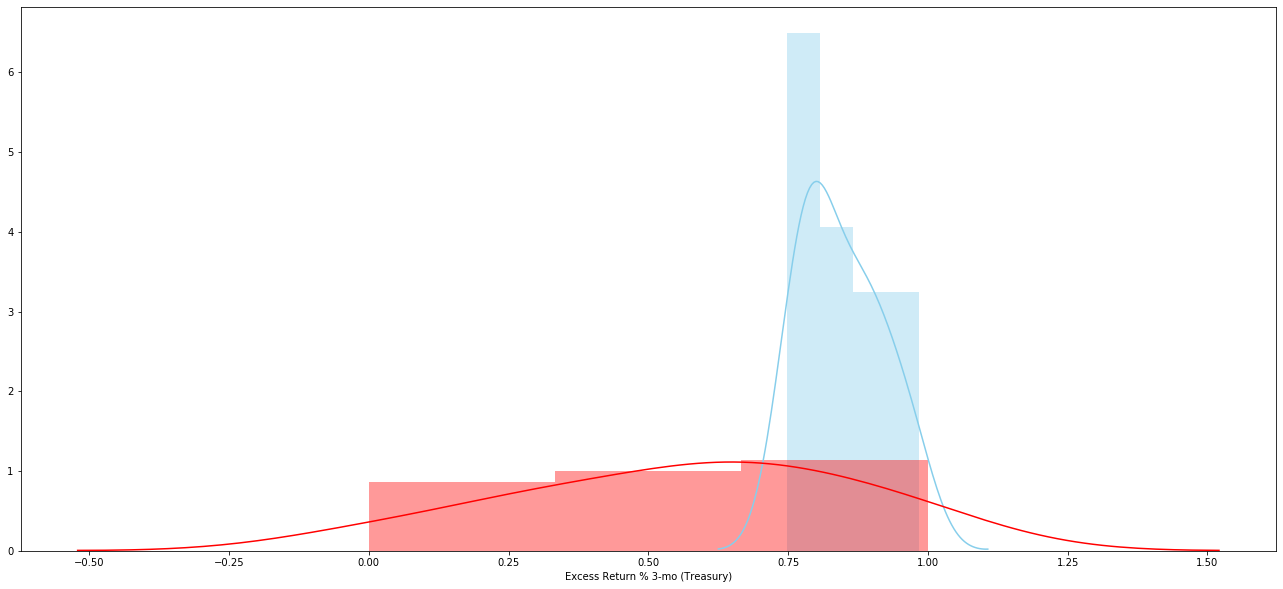

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  21.0  0.845671  0.073397  0.016017   0.812262   
 1  Excess Return % 3-mo (Agg)  21.0  0.509014  0.325770  0.071089   0.360725   
 2                    combined  42.0  0.677343  0.288830  0.044567   0.587337   
 
    Interval  
 0  0.879081  
 1  0.657303  
 2  0.767348  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.3367
 1                             Degrees of freedom =   40.0000
 2                                              t =    4.6199
 3                          Two side test p value =    0.0000
 4                         Difference < 0 p value =    1.0000
 5                         Difference > 0 p value =    0.0000
 6                                      Cohen's d =    1.4257
 7                                      Hedge's g =    1.3988
 8                                  Glass's delta =    

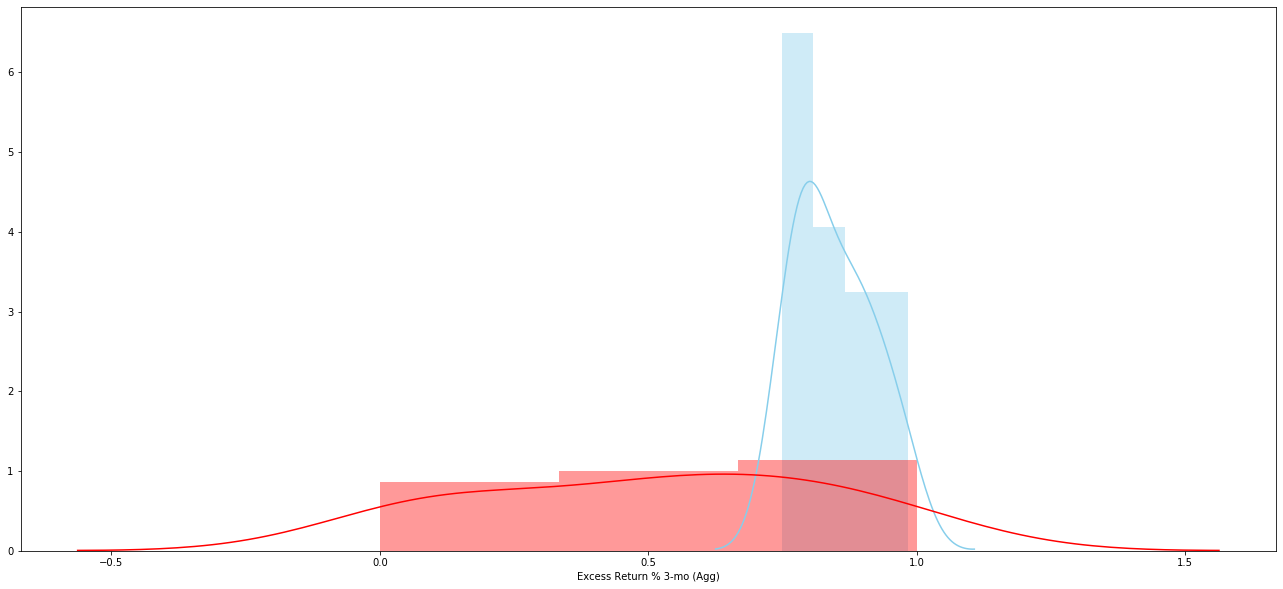

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  21.0  0.845671  0.073397  0.016017   
 1  Excess Return % 6-mo (Treasury)  21.0  0.601991  0.325418  0.071012   
 2                         combined  42.0  0.723831  0.263613  0.040676   
 
    95% Conf.  Interval  
 0   0.812262  0.879081  
 1   0.453863  0.750120  
 2   0.641684  0.805979  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...   0.2437
 1                              Degrees of freedom =   40.0000
 2                                               t =    3.3474
 3                           Two side test p value =    0.0018
 4                          Difference < 0 p value =    0.9991
 5                          Difference > 0 p value =    0.0009
 6                                       Cohen's d =    1.0330
 7                                       Hedge's g =    1.0136
 8                        

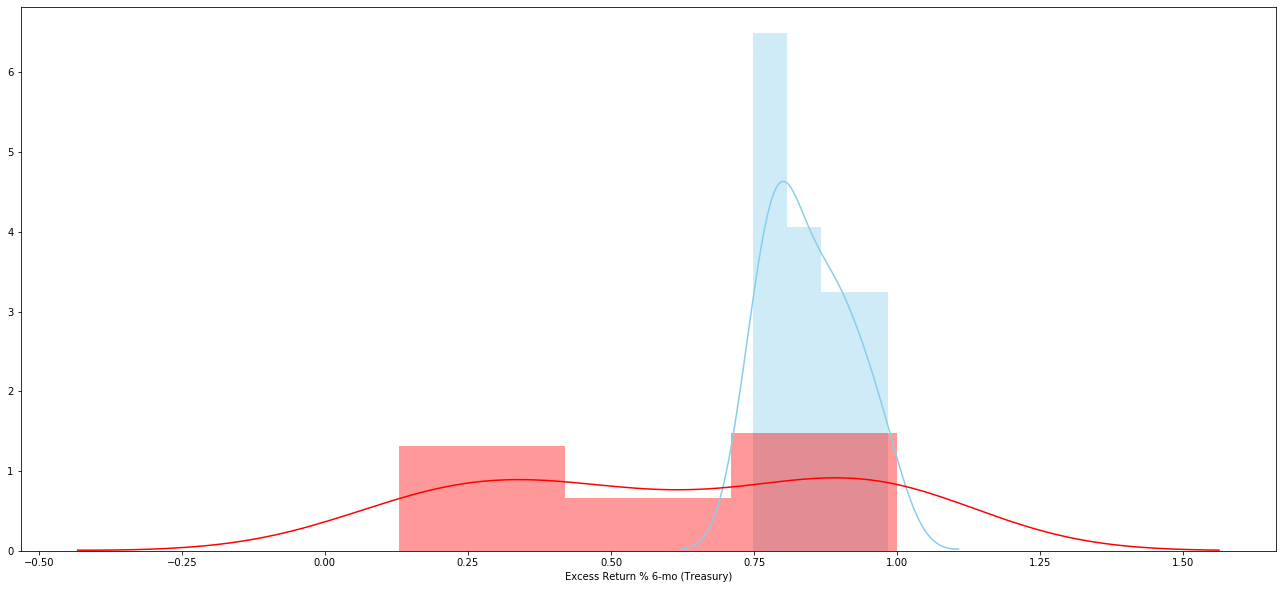

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  21.0  0.845671  0.073397  0.016017   0.812262   
 1  Excess Return % 6-mo (Agg)  21.0  0.503501  0.383720  0.083735   0.328834   
 2                    combined  42.0  0.674586  0.323167  0.049866   0.573880   
 
    Interval  
 0  0.879081  
 1  0.678168  
 2  0.775292  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.3422
 1                             Degrees of freedom =   40.0000
 2                                              t =    4.0136
 3                          Two side test p value =    0.0003
 4                         Difference < 0 p value =    0.9999
 5                         Difference > 0 p value =    0.0001
 6                                      Cohen's d =    1.2386
 7                                      Hedge's g =    1.2153
 8                                  Glass's delta =    

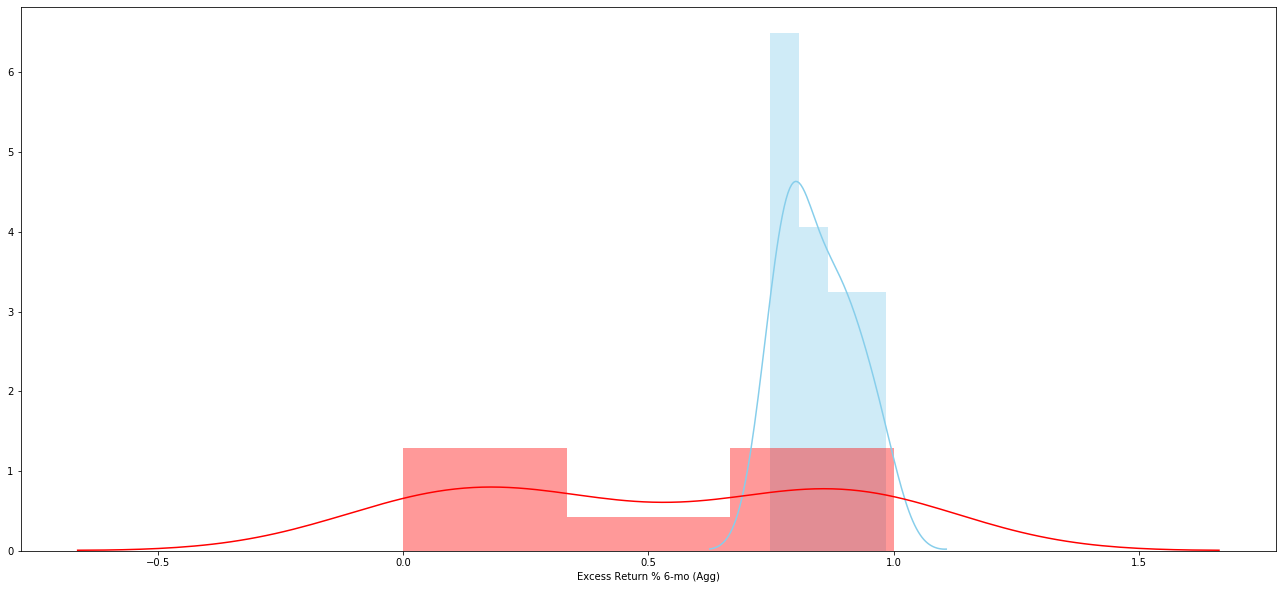

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  21.0  0.845671  0.073397  0.016017   
 1  Excess Return % 9-mo (Treasury)  21.0  0.632881  0.279826  0.061063   
 2                         combined  42.0  0.739276  0.228954  0.035328   
 
    95% Conf.  Interval  
 0   0.812262  0.879081  
 1   0.505506  0.760256  
 2   0.667929  0.810624  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...   0.2128
 1                              Degrees of freedom =   40.0000
 2                                               t =    3.3707
 3                           Two side test p value =    0.0017
 4                          Difference < 0 p value =    0.9992
 5                          Difference > 0 p value =    0.0008
 6                                       Cohen's d =    1.0402
 7                                       Hedge's g =    1.0206
 8                        

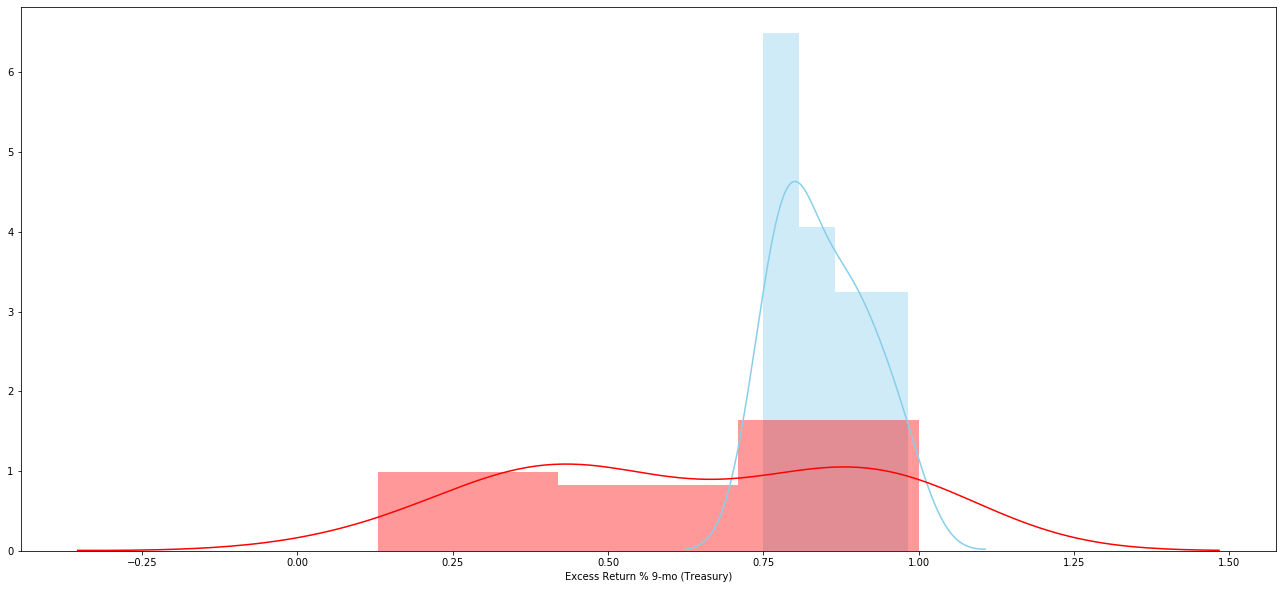

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  21.0  0.845671  0.073397  0.016017   0.812262   
 1  Excess Return % 9-mo (Agg)  21.0  0.526755  0.342931  0.074834   0.370654   
 2                    combined  42.0  0.686213  0.293328  0.045262   0.594805   
 
    Interval  
 0  0.879081  
 1  0.682855  
 2  0.777621  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.3189
 1                             Degrees of freedom =   40.0000
 2                                              t =    4.1673
 3                          Two side test p value =    0.0002
 4                         Difference < 0 p value =    0.9999
 5                         Difference > 0 p value =    0.0001
 6                                      Cohen's d =    1.2861
 7                                      Hedge's g =    1.2618
 8                                  Glass's delta =    

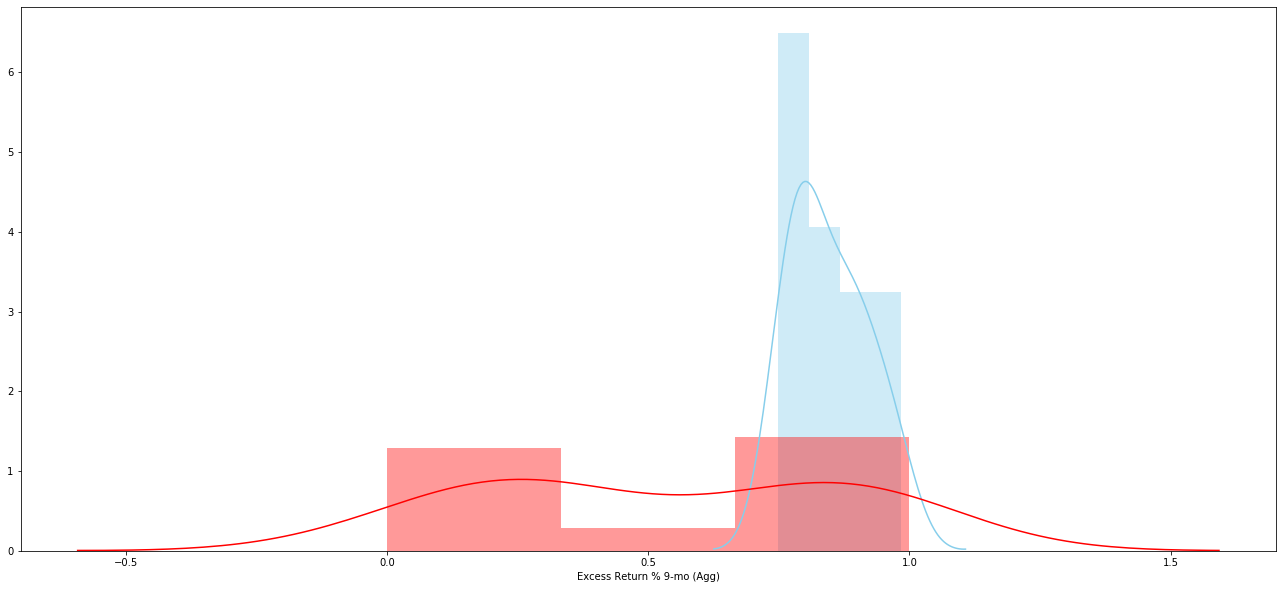

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  21.0  0.845671  0.073397  0.016017   
 1  Excess Return % 12-mo (Treasury)  21.0  0.589674  0.322877  0.070458   
 2                          combined  42.0  0.717673  0.265074  0.040902   
 
    95% Conf.  Interval  
 0   0.812262  0.879081  
 1   0.442703  0.736646  
 2   0.635070  0.800276  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...   0.2560
 1                              Degrees of freedom =   40.0000
 2                                               t =    3.5430
 3                           Two side test p value =    0.0010
 4                          Difference < 0 p value =    0.9995
 5                          Difference > 0 p value =    0.0005
 6                                       Cohen's d =    1.0934
 7                                       Hedge's g =    1.0728
 8                    

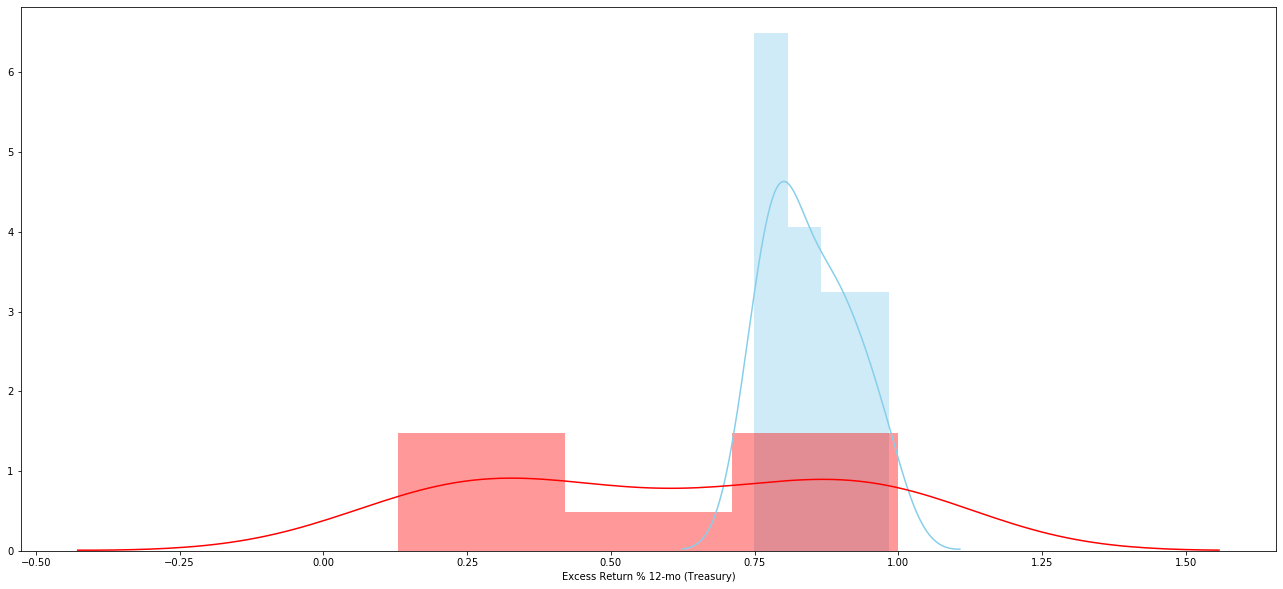

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  21.0  0.845671  0.073397  0.016017   0.812262   
 1  Excess Return % 12-mo (Agg)  21.0  0.463536  0.392729  0.085701   0.284768   
 2                     combined  42.0  0.654604  0.339503  0.052386   0.548807   
 
    Interval  
 0  0.879081  
 1  0.642305  
 2  0.760401  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.3821
 1                              Degrees of freedom =   40.0000
 2                                               t =    4.3831
 3                           Two side test p value =    0.0001
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.3526
 7                                       Hedge's g =    1.3271
 8                                   Glass

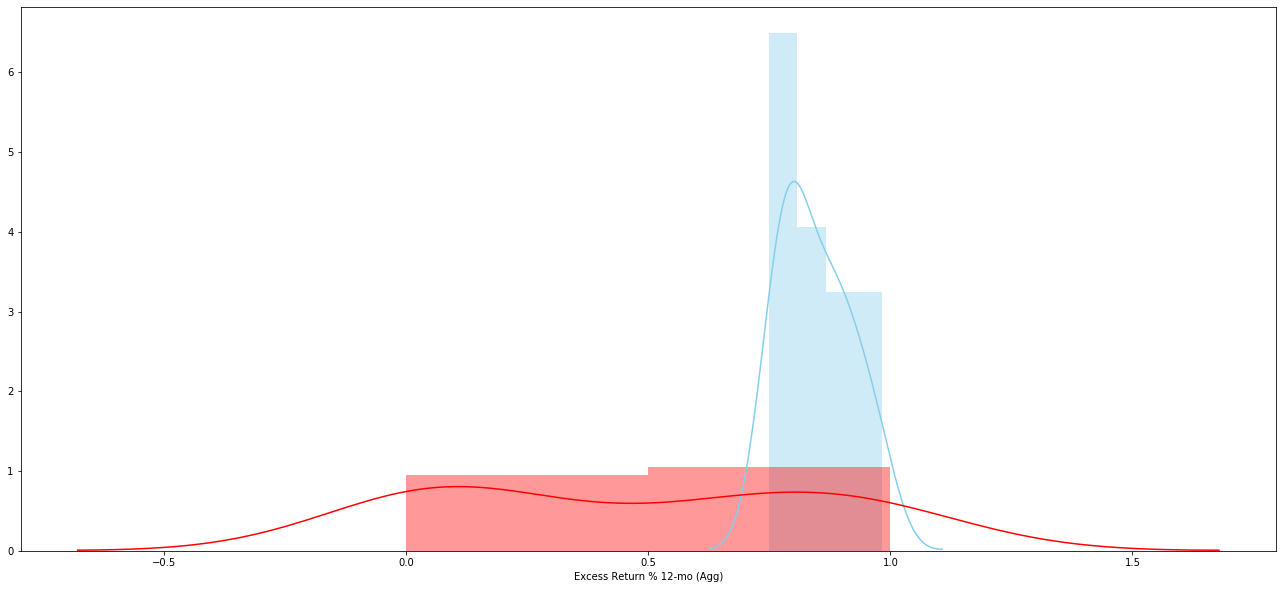

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  21.0  0.845671  0.073397  0.016017   
 1  Excess Return % 24-mo (Treasury)  21.0  0.553106  0.246407  0.053770   
 2                          combined  42.0  0.699389  0.232736  0.035912   
 
    95% Conf.  Interval  
 0   0.812262  0.879081  
 1   0.440943  0.665270  
 2   0.626863  0.771915  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...   0.2926
 1                              Degrees of freedom =   40.0000
 2                                               t =    5.2146
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.6093
 7                                       Hedge's g =    1.5789
 8                    

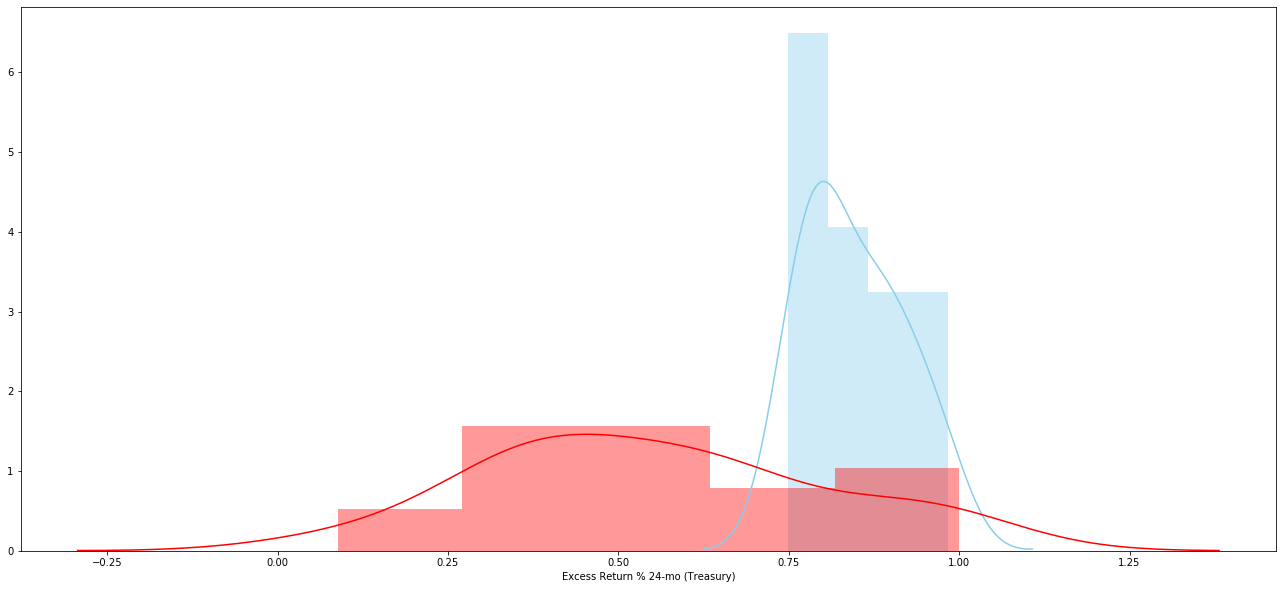

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  21.0  0.845671  0.073397  0.016017   0.812262   
 1  Excess Return % 24-mo (Agg)  21.0  0.365391  0.345145  0.075317   0.208283   
 2                     combined  42.0  0.605531  0.346138  0.053410   0.497667   
 
    Interval  
 0  0.879081  
 1  0.522499  
 2  0.713396  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.4803
 1                              Degrees of freedom =   40.0000
 2                                               t =    6.2373
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.9249
 7                                       Hedge's g =    1.8886
 8                                   Glass

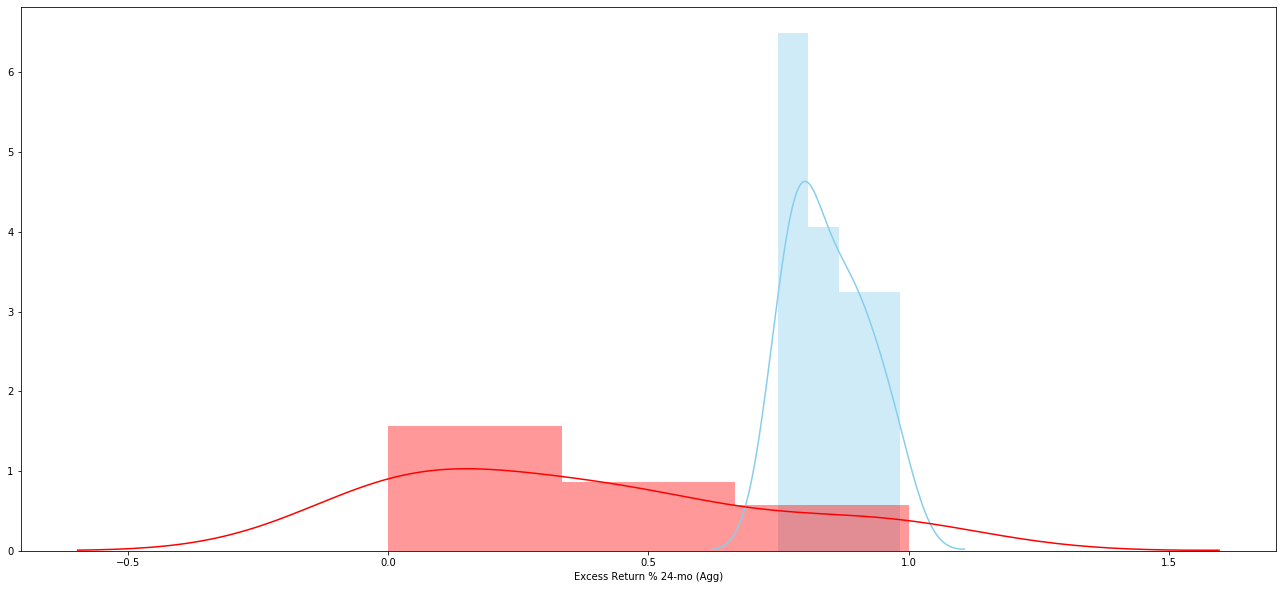

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  21.0  0.845671  0.073397  0.016017   
 1  Excess Return % 36-mo (Treasury)  21.0  0.627559  0.241588  0.052719   
 2                          combined  42.0  0.736615  0.208043  0.032102   
 
    95% Conf.  Interval  
 0   0.812262  0.879081  
 1   0.517590  0.737528  
 2   0.671785  0.801446  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...   0.2181
 1                              Degrees of freedom =   40.0000
 2                                               t =    3.9586
 3                           Two side test p value =    0.0003
 4                          Difference < 0 p value =    0.9998
 5                          Difference > 0 p value =    0.0002
 6                                       Cohen's d =    1.2217
 7                                       Hedge's g =    1.1986
 8                    

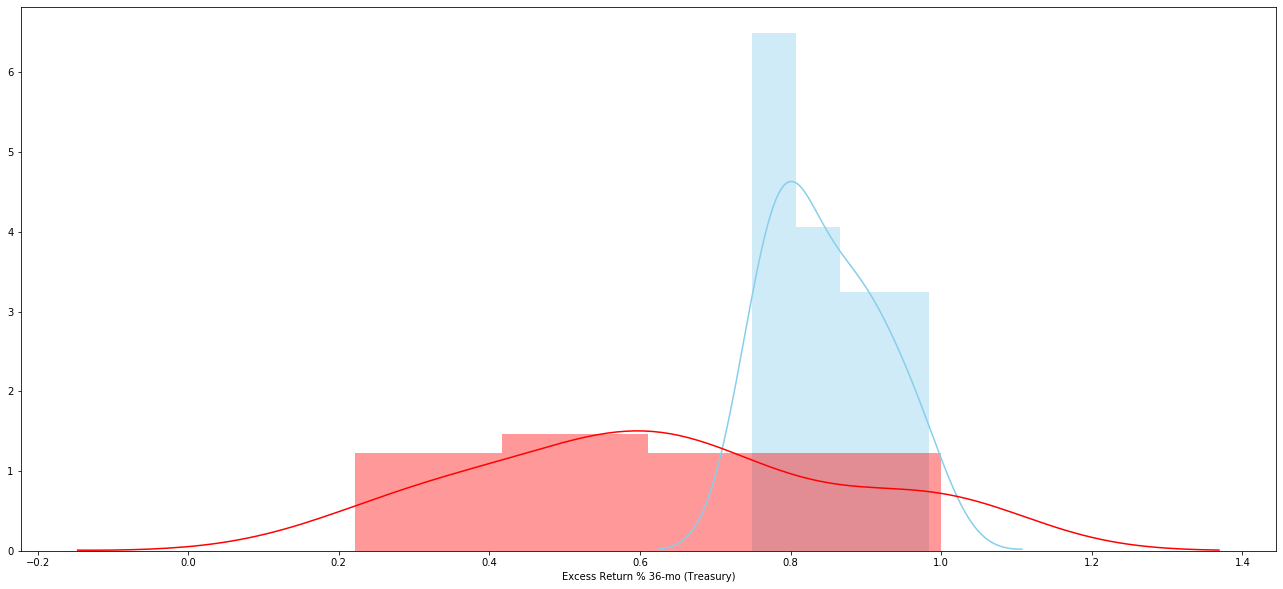

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  21.0  0.845671  0.073397  0.016017   0.812262   
 1  Excess Return % 36-mo (Agg)  21.0  0.382733  0.342159  0.074665   0.226985   
 2                     combined  42.0  0.614202  0.338557  0.052241   0.508701   
 
    Interval  
 0  0.879081  
 1  0.538482  
 2  0.719704  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.4629
 1                              Degrees of freedom =   40.0000
 2                                               t =    6.0623
 3                           Two side test p value =    0.0000
 4                          Difference < 0 p value =    1.0000
 5                          Difference > 0 p value =    0.0000
 6                                       Cohen's d =    1.8709
 7                                       Hedge's g =    1.8356
 8                                   Glass

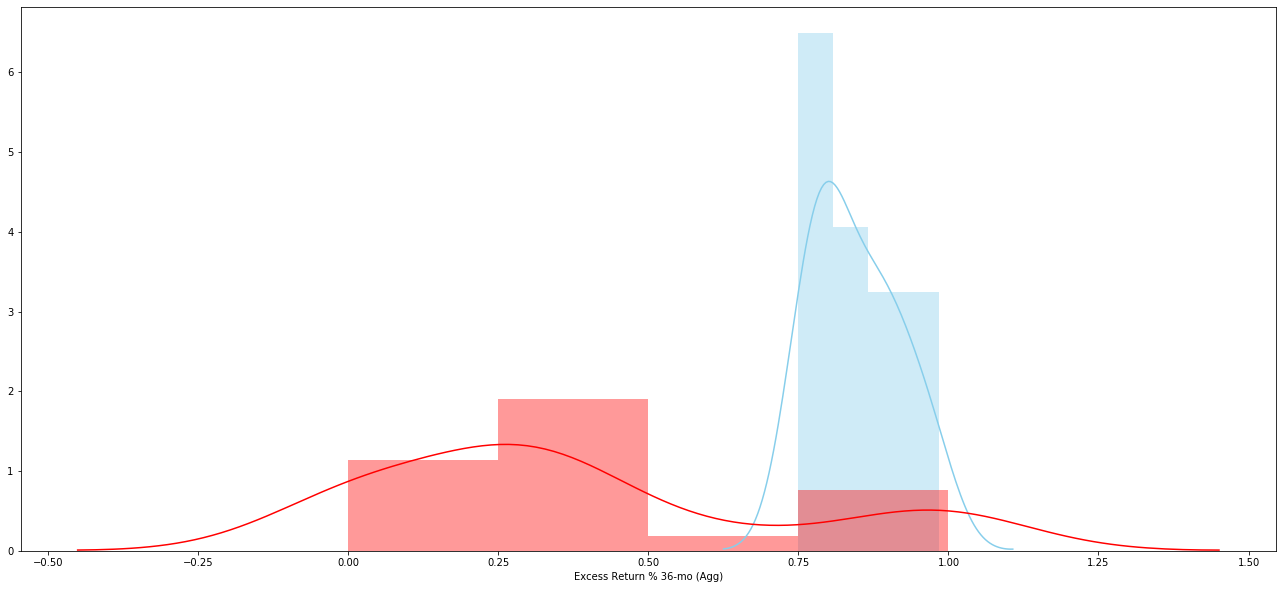

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_EM.csv') 

In [36]:
df1.describe()

,OAS,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,256.000000,256.000000,256.000000,254.000000,254.000000,251.000000,251.000000,248.000000,248.000000,245.000000,245.000000,233.000000,233.000000,221.000000,221.000000,255.000000
mean,0.395713,0.498948,0.495798,0.497792,0.493628,0.511375,0.500867,0.512766,0.497830,0.507787,0.495017,0.500095,0.487434,0.504781,0.497593,2.564706
std,0.269082,0.218167,0.231360,0.209246,0.211150,0.233158,0.229447,0.213667,0.212037,0.227149,0.227807,0.200797,0.234734,0.244943,0.232889,1.058677
min,-0.237986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.228001,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.000000
50%,0.309549,0.508152,0.508637,0.517296,0.509105,0.521826,0.521492,0.518177,0.502495,0.501572,0.495088,0.495392,0.517583,0.487873,0.540138,3.000000
75%,0.523819,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   21.0  0.845671  0.073397  0.016017   
 1  Excess Return % 3-mo (Treasury)  254.0  0.497792  0.209246  0.013129   
 2                         combined  275.0  0.524358  0.222235  0.013401   
 
    95% Conf.  Interval  
 0   0.812262  0.879081  
 1   0.471936  0.523649  
 2   0.497975  0.550740  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.3479
 1                              Degrees of freedom =   273.0000
 2                                               t =     7.5692
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.7187
 7                                       Hedge's g =     1.7139
 8           

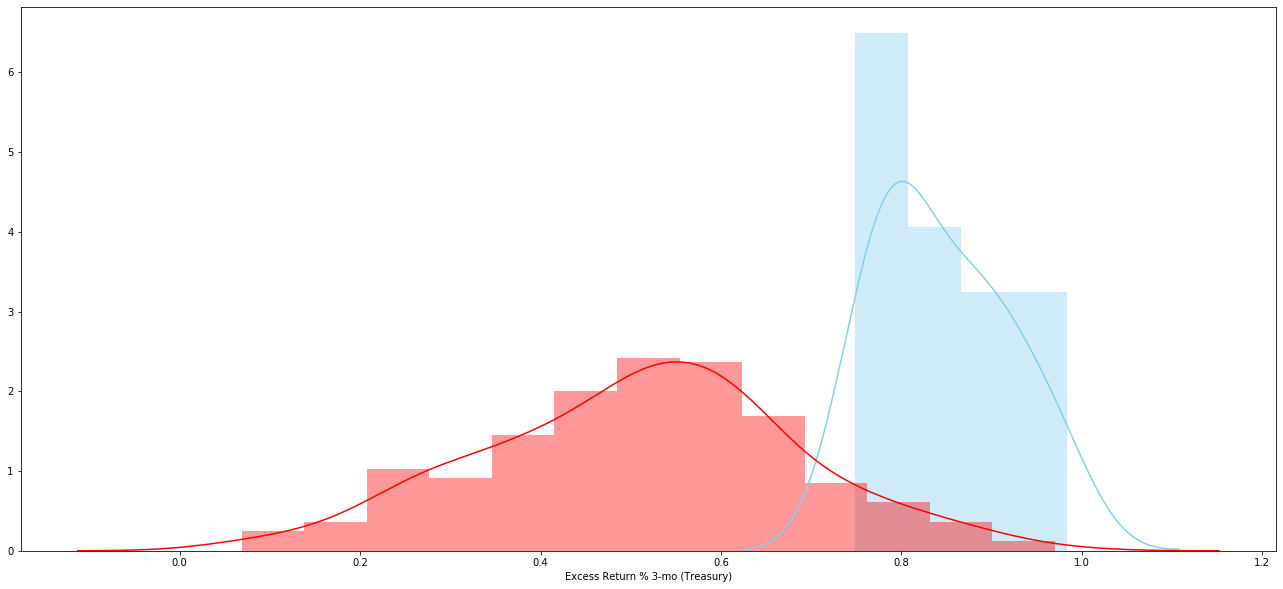

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   21.0  0.845671  0.073397  0.016017   0.812262   
 1  Excess Return % 3-mo (Agg)  254.0  0.493628  0.211150  0.013249   0.467536   
 2                    combined  275.0  0.520512  0.224352  0.013529   0.493878   
 
    Interval  
 0  0.879081  
 1  0.519720  
 2  0.547145  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.3520
 1                             Degrees of freedom =   273.0000
 2                                              t =     7.5914
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.7237
 7                                      Hedge's g =     1.7190
 8                                  Glass'

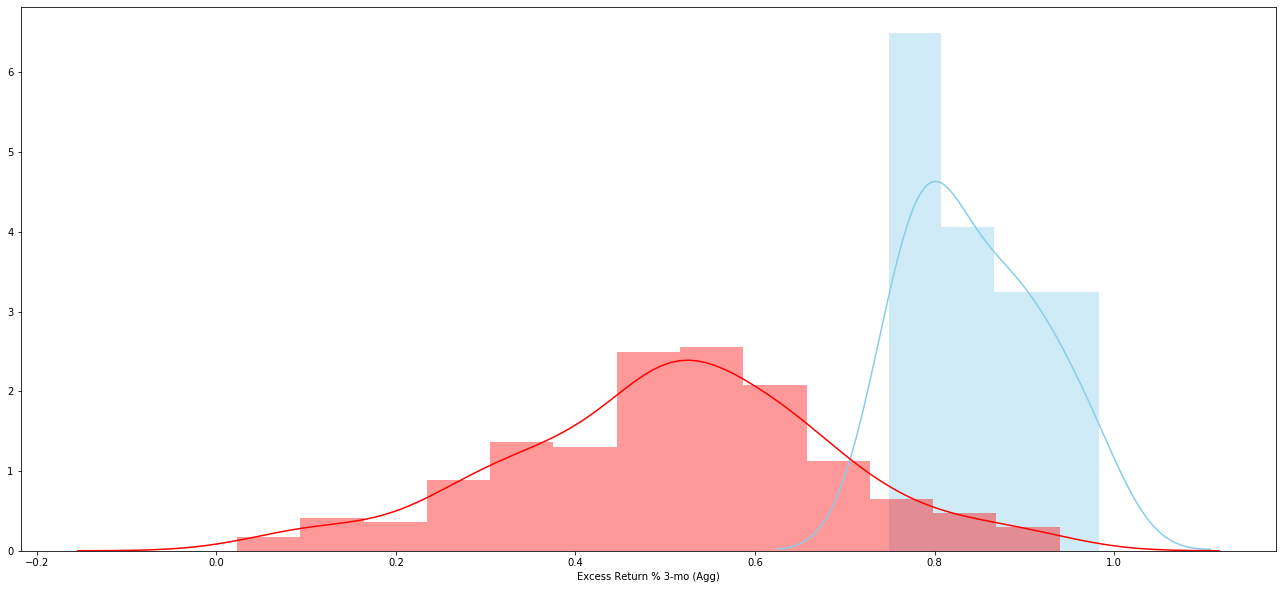

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   21.0  0.845671  0.073397  0.016017   
 1  Excess Return % 6-mo (Treasury)  251.0  0.511375  0.233158  0.014717   
 2                         combined  272.0  0.537184  0.241948  0.014670   
 
    95% Conf.  Interval  
 0   0.812262  0.879081  
 1   0.482390  0.540359  
 2   0.508302  0.566066  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.3343
 1                              Degrees of freedom =   270.0000
 2                                               t =     6.5334
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4842
 7                                       Hedge's g =     1.4800
 8           

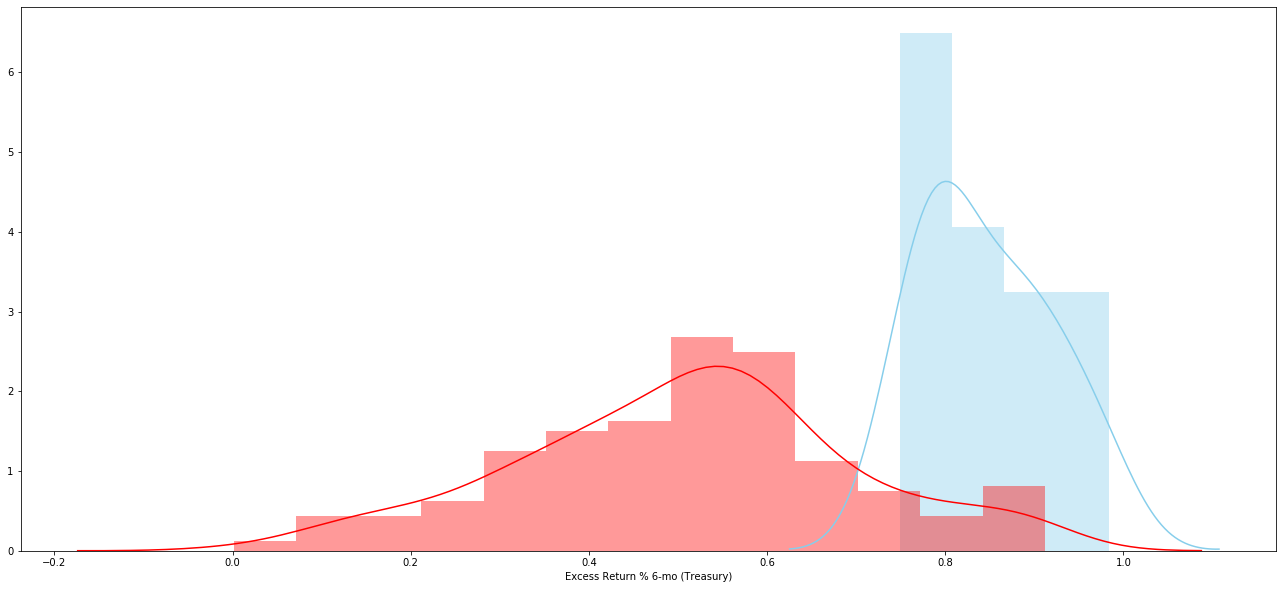

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   21.0  0.845671  0.073397  0.016017   0.812262   
 1  Excess Return % 6-mo (Agg)  251.0  0.500867  0.229447  0.014483   0.472343   
 2                    combined  272.0  0.527488  0.239720  0.014535   0.498871   
 
    Interval  
 0  0.879081  
 1  0.529390  
 2  0.556104  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.3448
 1                             Degrees of freedom =   270.0000
 2                                              t =     6.8469
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.5554
 7                                      Hedge's g =     1.5510
 8                                  Glass'

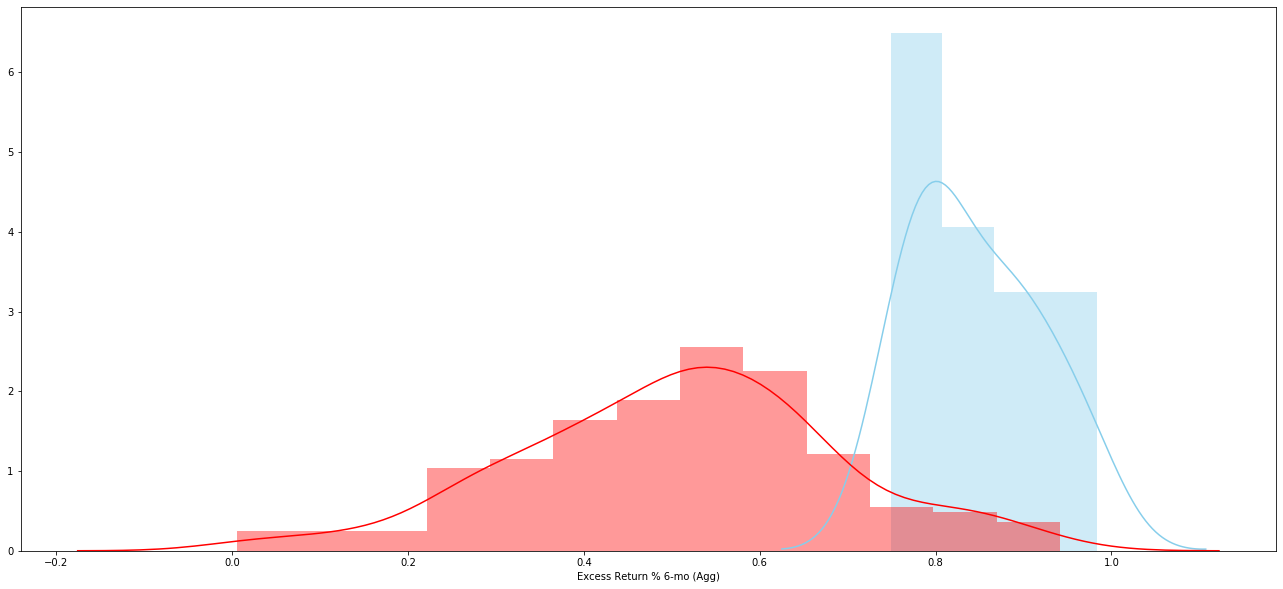

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   21.0  0.845671  0.073397  0.016017   
 1  Excess Return % 9-mo (Treasury)  248.0  0.512766  0.213667  0.013568   
 2                         combined  269.0  0.538754  0.224688  0.013699   
 
    95% Conf.  Interval  
 0   0.812262  0.879081  
 1   0.486042  0.539489  
 2   0.511782  0.565727  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.3329
 1                              Degrees of freedom =   267.0000
 2                                               t =     7.0939
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.6122
 7                                       Hedge's g =     1.6077
 8           

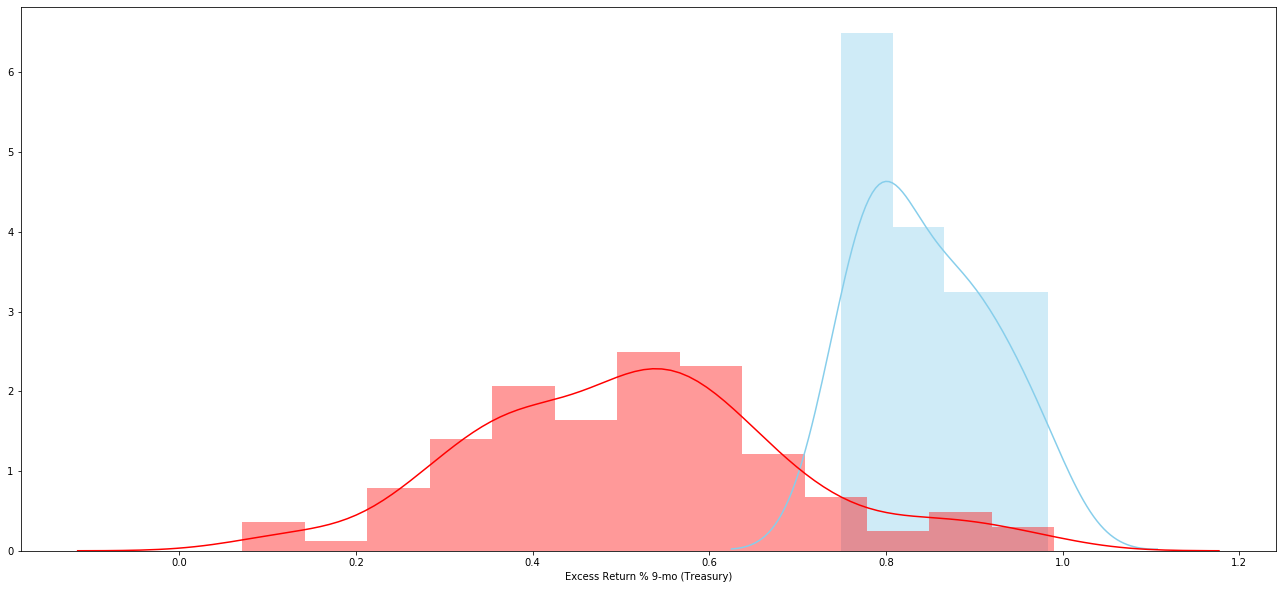

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   21.0  0.845671  0.073397  0.016017   0.812262   
 1  Excess Return % 9-mo (Agg)  248.0  0.497830  0.212037  0.013464   0.471310   
 2                    combined  269.0  0.524985  0.224899  0.013712   0.497987   
 
    Interval  
 0  0.879081  
 1  0.524350  
 2  0.551983  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.3478
 1                             Degrees of freedom =   267.0000
 2                                              t =     7.4686
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.6974
 7                                      Hedge's g =     1.6926
 8                                  Glass'

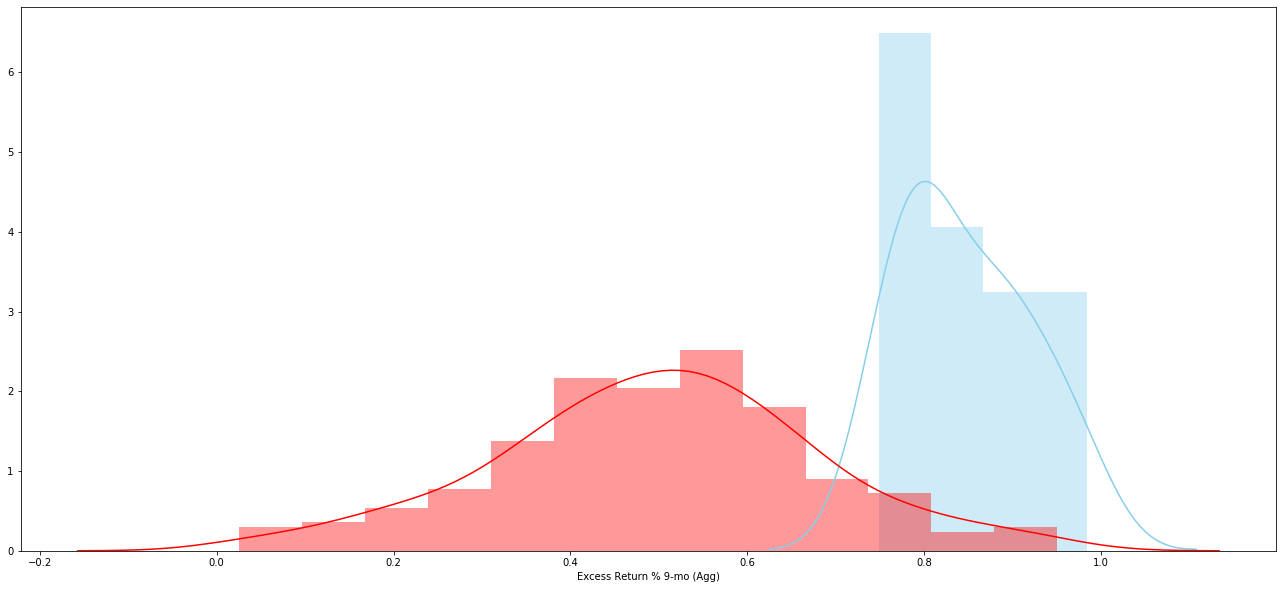

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   21.0  0.845671  0.073397  0.016017   
 1  Excess Return % 12-mo (Treasury)  245.0  0.507787  0.227149  0.014512   
 2                          combined  266.0  0.534462  0.237165  0.014542   
 
    95% Conf.  Interval  
 0   0.812262  0.879081  
 1   0.479203  0.536372  
 2   0.505831  0.563094  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.3379
 1                              Degrees of freedom =   264.0000
 2                                               t =     6.7759
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.5407
 7                                       Hedge's g =     1.5363
 8       

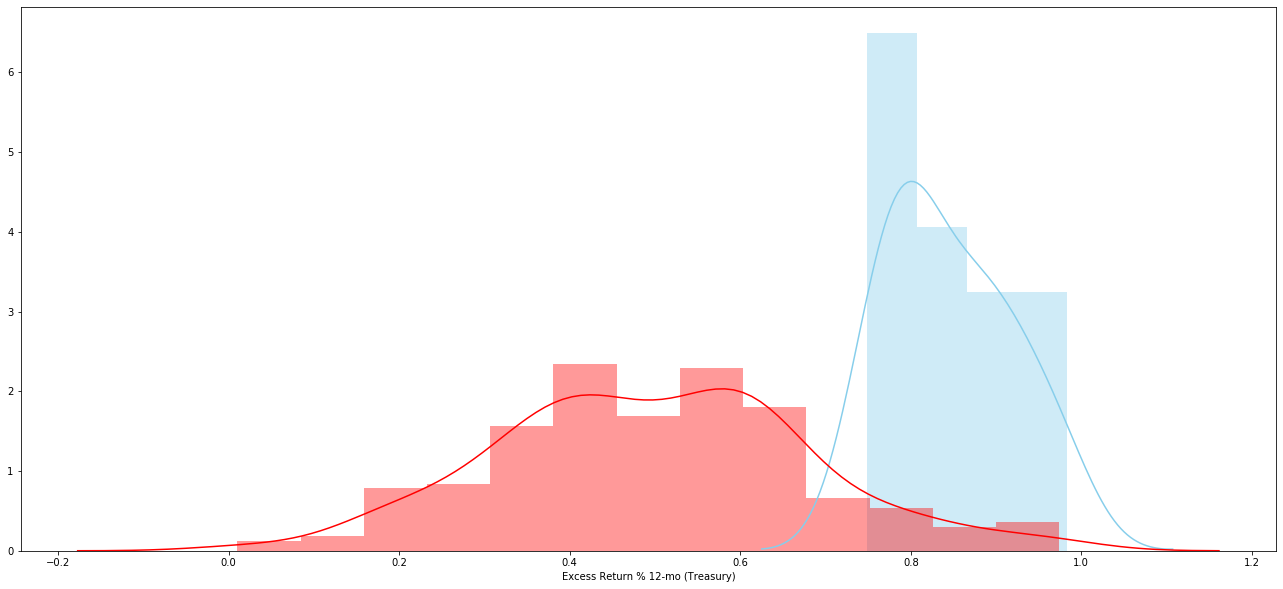

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   21.0  0.845671  0.073397  0.016017   
 1  Excess Return % 12-mo (Agg)  245.0  0.495017  0.227807  0.014554   
 2                     combined  266.0  0.522700  0.239091  0.014660   
 
    95% Conf.  Interval  
 0   0.812262  0.879081  
 1   0.466349  0.523684  
 2   0.493836  0.551564  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.3507
 1                              Degrees of freedom =   264.0000
 2                                               t =     7.0118
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.5943
 7                                       Hedge's g =     1.5898
 8                           

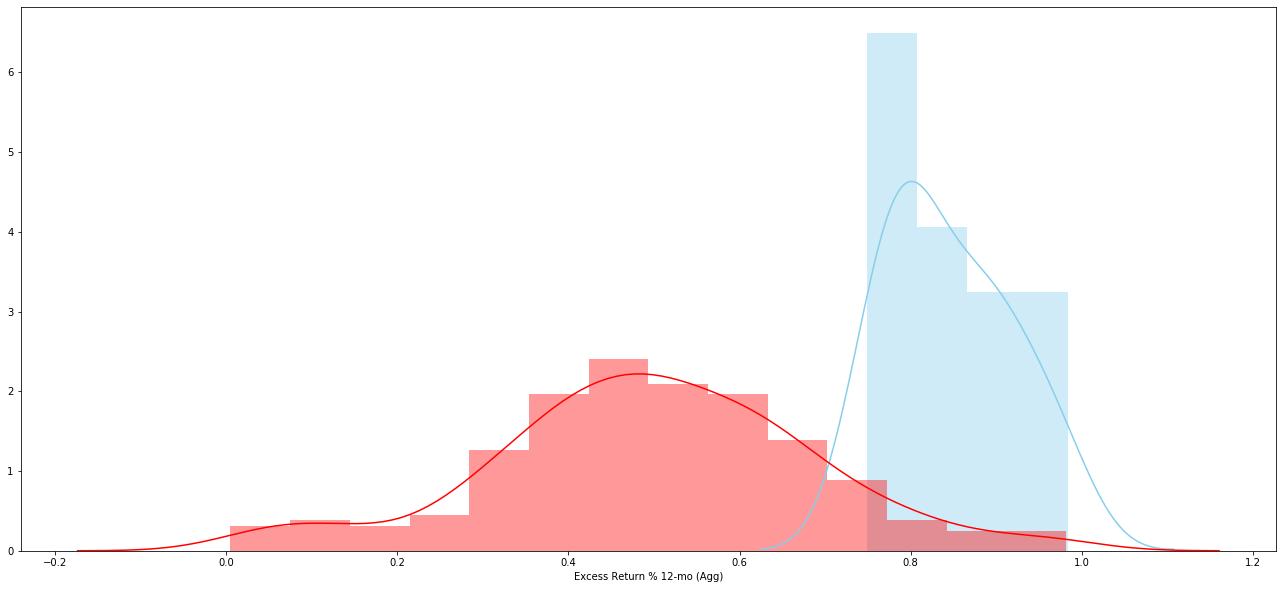

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   21.0  0.845671  0.073397  0.016017   
 1  Excess Return % 24-mo (Treasury)  233.0  0.500095  0.200797  0.013155   
 2                          combined  254.0  0.528666  0.215620  0.013529   
 
    95% Conf.  Interval  
 0   0.812262  0.879081  
 1   0.474177  0.526013  
 2   0.502022  0.555310  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.3456
 1                              Degrees of freedom =   252.0000
 2                                               t =     7.8276
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.7834
 7                                       Hedge's g =     1.7781
 8       

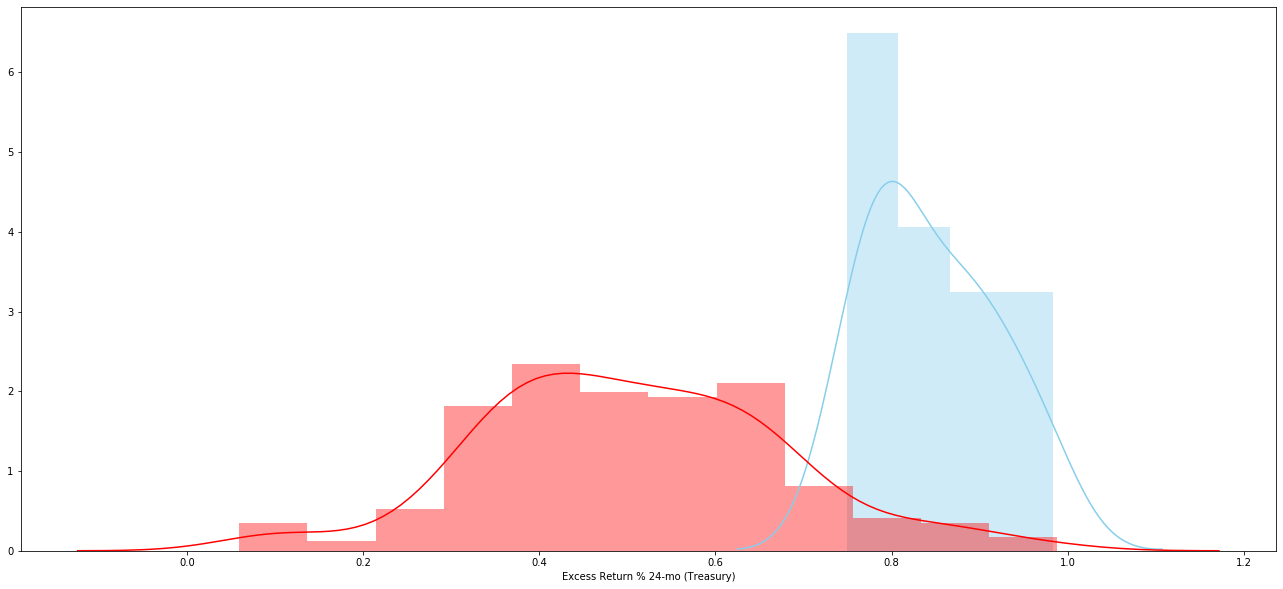

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   21.0  0.845671  0.073397  0.016017   
 1  Excess Return % 24-mo (Agg)  233.0  0.487434  0.234734  0.015378   
 2                     combined  254.0  0.517052  0.246422  0.015462   
 
    95% Conf.  Interval  
 0   0.812262  0.879081  
 1   0.457135  0.517732  
 2   0.486601  0.547502  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.3582
 1                              Degrees of freedom =   252.0000
 2                                               t =     6.9519
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.5839
 7                                       Hedge's g =     1.5792
 8                           

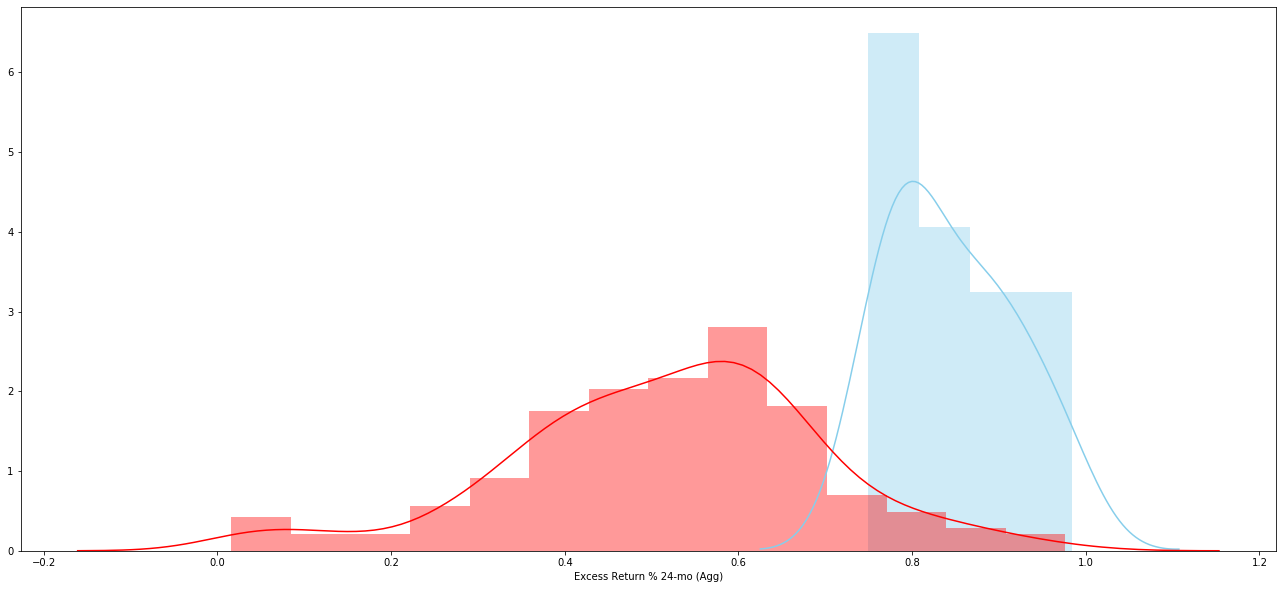

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   21.0  0.845671  0.073397  0.016017   
 1  Excess Return % 36-mo (Treasury)  221.0  0.504781  0.244943  0.016477   
 2                          combined  242.0  0.534363  0.253896  0.016321   
 
    95% Conf.  Interval  
 0   0.812262  0.879081  
 1   0.472309  0.537254  
 2   0.502213  0.566513  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.3409
 1                              Degrees of freedom =   240.0000
 2                                               t =     6.3398
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.4477
 7                                       Hedge's g =     1.4432
 8       

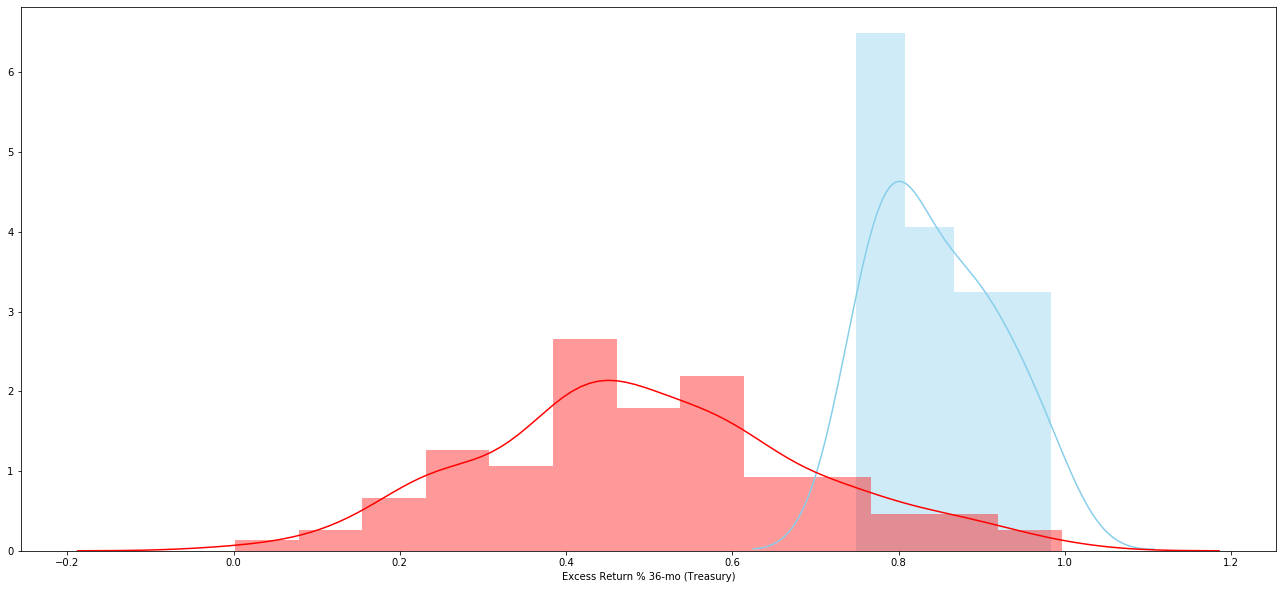

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   21.0  0.845671  0.073397  0.016017   
 1  Excess Return % 36-mo (Agg)  221.0  0.497593  0.232889  0.015666   
 2                     combined  242.0  0.527798  0.244130  0.015693   
 
    95% Conf.  Interval  
 0   0.812262  0.879081  
 1   0.466719  0.528467  
 2   0.496885  0.558712  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.3481
 1                              Degrees of freedom =   240.0000
 2                                               t =     6.8056
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.5541
 7                                       Hedge's g =     1.5492
 8                           

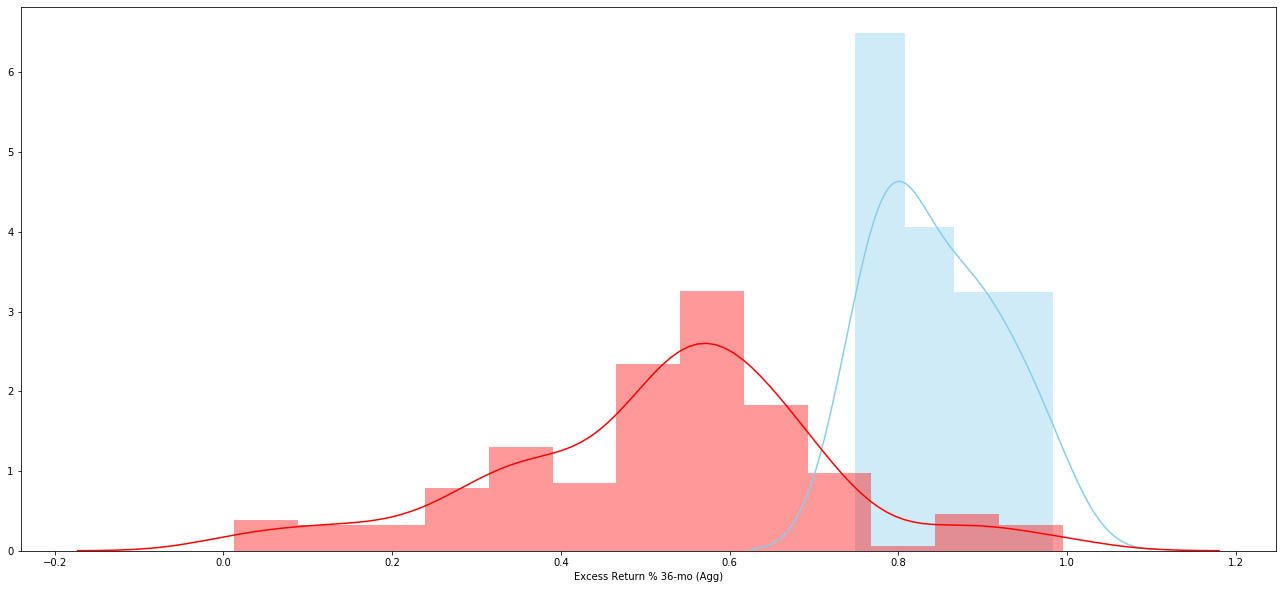

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")